## Encoding Method Sample Code

In [1]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

text = "Hello, how are you? I am good!"

# Word Tokenization with NLTK
tokens = word_tokenize(text)
print(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Hello', ',', 'how', 'are', 'you', '?', 'I', 'am', 'good', '!']


In [2]:
from nltk.tokenize import sent_tokenize

nltk.download('punkt')

text = "Hello, how are you? I am good! It's a sunny day."

# Sentence Tokenization with NLTK
sentences = sent_tokenize(text)
print(sentences)


['Hello, how are you?', 'I am good!', "It's a sunny day."]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
def get_stats(vocab):
    pairs = {}
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols) - 1):
            pair = (symbols[i], symbols[i+1])
            pairs[pair] = pairs.get(pair, 0) + freq
    return pairs

def merge_vocab(pair, vocab_in):
    vocab_out = {}
    bigram = ' '.join(pair)
    replacement = ''.join(pair)
    for word in vocab_in:
        w_out = word.replace(bigram, replacement)
        vocab_out[w_out] = vocab_in[word]
    return vocab_out

# Example vocabulary - word frequencies in a corpus
vocab = {'l o w </w>' : 5, 'l o w e r </w>' : 2, 'n e w e s t </w>':6, 'w i d e s t </w>':3}

num_merges = 10  # Number of BPE merges
for i in range(num_merges):
    pairs = get_stats(vocab)
    if not pairs:
        break
    best = max(pairs, key=pairs.get)
    vocab = merge_vocab(best, vocab)
    print(f"Step {i + 1}")
    print(best)
    print(vocab)


Step 1
('e', 's')
{'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w es t </w>': 6, 'w i d es t </w>': 3}
Step 2
('es', 't')
{'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est </w>': 6, 'w i d est </w>': 3}
Step 3
('est', '</w>')
{'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}
Step 4
('l', 'o')
{'lo w </w>': 5, 'lo w e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}
Step 5
('lo', 'w')
{'low </w>': 5, 'low e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}
Step 6
('n', 'e')
{'low </w>': 5, 'low e r </w>': 2, 'ne w est</w>': 6, 'w i d est</w>': 3}
Step 7
('ne', 'w')
{'low </w>': 5, 'low e r </w>': 2, 'new est</w>': 6, 'w i d est</w>': 3}
Step 8
('new', 'est</w>')
{'low </w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'w i d est</w>': 3}
Step 9
('low', '</w>')
{'low</w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'w i d est</w>': 3}
Step 10
('w', 'i')
{'low</w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'wi d est</w>': 3}


## Multimodality using CLIP

In [4]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [8]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/American_Eskimo_Dog.jpg/360px-American_Eskimo_Dog.jpg -O sample.jpg

--2023-12-27 15:34:52--  https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/American_Eskimo_Dog.jpg/360px-American_Eskimo_Dog.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36760 (36K) [image/jpeg]
Saving to: ‘sample.jpg’

sample.jpg          100%[===================>]  35.90K  --.-KB/s    in 0.001s  

2023-12-27 15:34:52 (24.5 MB/s) - ‘sample.jpg’ saved [36760/36760]



In [37]:
from PIL import Image

image_path = "/content/sample.jpg"

image = Image.open(image_path) # Use any iamge
text = ["A very large white mouse", "A white dog", "A white cat"]  # Description


In [38]:
inputs = processor(text=text, images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the probabilities


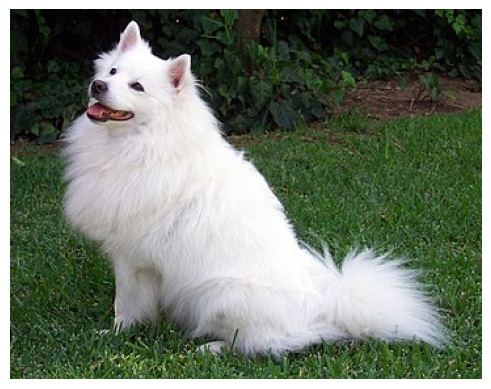

Best match index: 1
Best match text: A white dog


In [39]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.axis('off')
plt.show()

best_match = probs.argmax(dim=1)
print(f"Best match index: {best_match.item()}")
print(f"Best match text: {text[best_match.item()]}")
